In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from datamodule import WUSUSegmentationDataModule
from lightning.pytorch import seed_everything
import torch
import os
import matplotlib.pyplot as plt

/shared/marangi/utils/miniconda/miniconda/envs/evocity_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:albumentations.check_version:A new version of Albumentations is available: 2.0.8 (you have 1.4.10). Upgrade using: pip install --upgrade albumentations


Seed set to 42


INFO: merge delle classi 'building' e 'water' abilitato
Image shape: torch.Size([4, 512, 512]), Mask shape: torch.Size([512, 512])


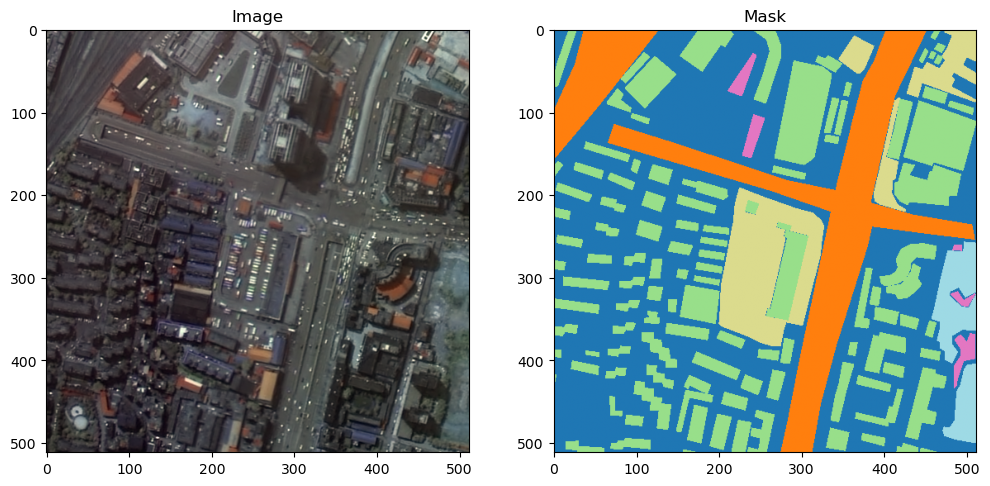

In [83]:
seed_everything(42, workers=True) # per riproducibilità
IN_CHANNELS=4
MERGE_CLASSES = True
REPO_ROOT = Path(os.getcwd()).parent
DATA_ROOT = REPO_ROOT / "data" / "WUSU_preprocessed"
CLASS_MAPPING_PATH = REPO_ROOT / "data" / "OpenWUSU512" / "class_mapping.json"
TARGET_GSD = 1 # espressa in metri
datamodule = WUSUSegmentationDataModule(data_root=DATA_ROOT, class_mapping_path=CLASS_MAPPING_PATH, in_channels=IN_CHANNELS, batch_size=2, num_workers=4, merge_classes=MERGE_CLASSES, target_gsd=TARGET_GSD)
datamodule.setup()
train_dataset = datamodule.train_dataset
dictionary = train_dataset.__getitem__(0)
img, mask = dictionary["image"], dictionary["mask"]
print(f"Image shape: {img.shape}, Mask shape: {mask.shape}")
fig, ax = plt.subplots(1, 2 , figsize=(12,6))
rgb_image = img[:3, :, :].permute(1,2,0).numpy()
rgb_image = (rgb_image - rgb_image.min(axis=(0,1), keepdims=True)) / (rgb_image.max(axis=(0,1), keepdims=True) - rgb_image.min(axis=(0,1), keepdims=True))
ax[0].imshow(rgb_image)
ax[0].set_title("Image")
ax[1].imshow(mask, cmap='tab20')
ax[1].set_title("Mask")
plt.show()

Seed set to 42


INFO: merge delle classi 'building' e 'water' abilitato
INFO: merge delle classi 'building' e 'water' abilitato
INFO: merge delle classi 'building' e 'water' abilitato
INFO: merge delle classi 'building' e 'water' abilitato
INFO: merge delle classi 'building' e 'water' abilitato


/tmp/ipykernel_921642/1489033976.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.75, 1])


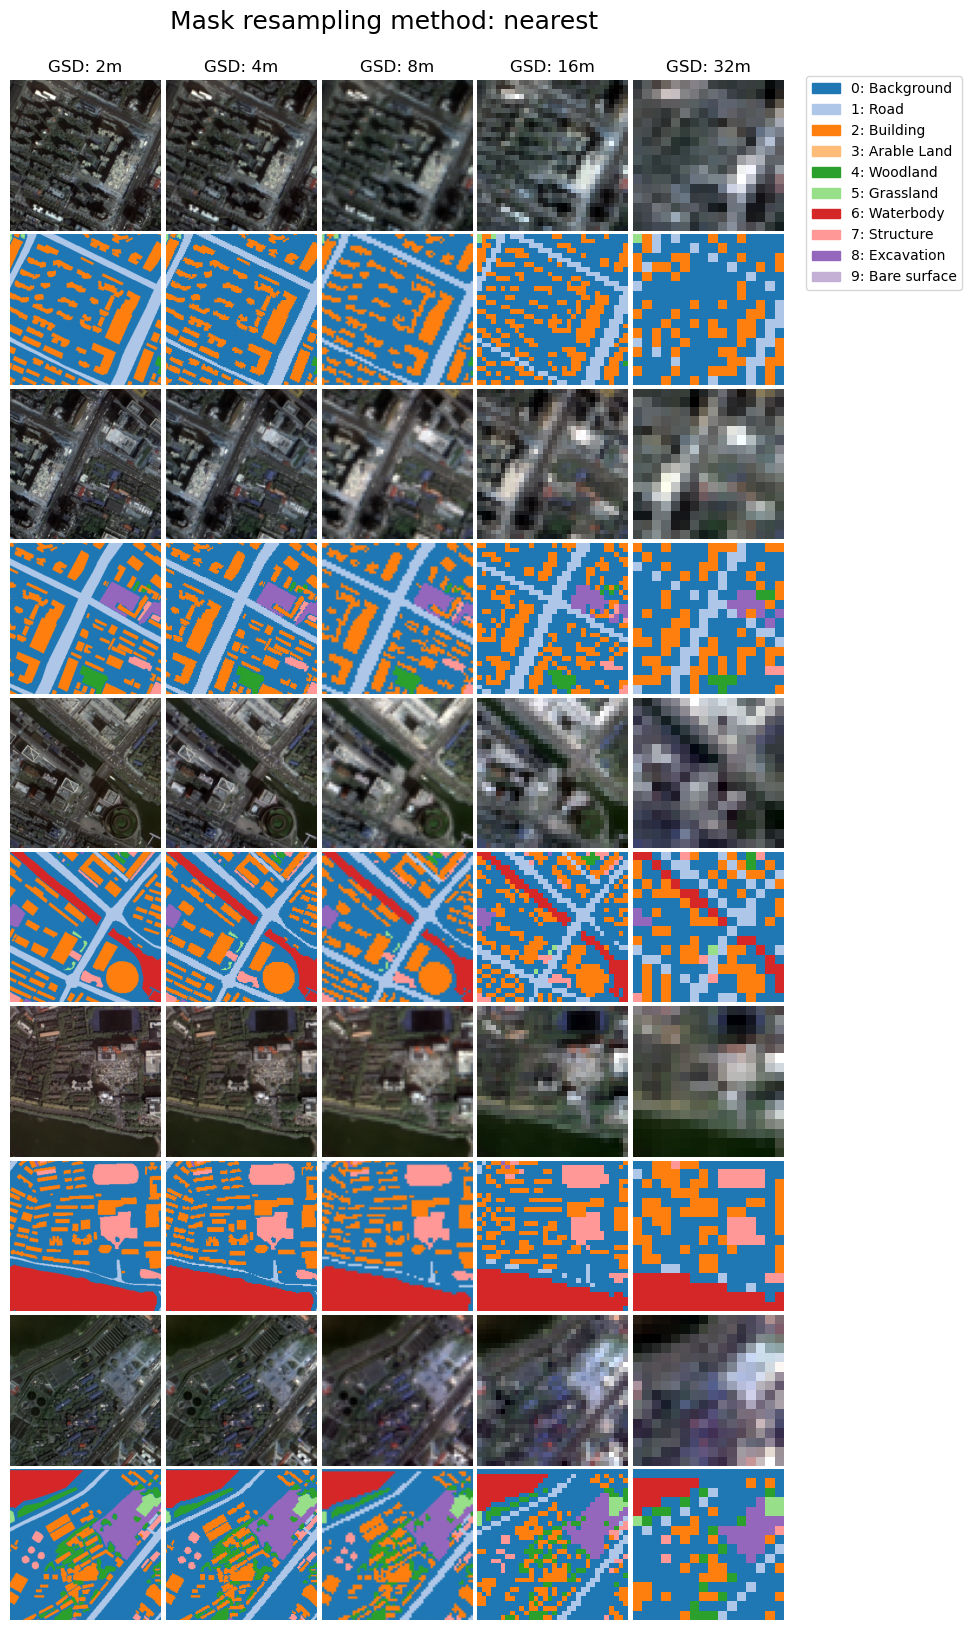

In [25]:
seed_everything(42, workers=True) # per riproducibilità
IN_CHANNELS=4
MERGE_CLASSES = True
REPO_ROOT = Path(os.getcwd()).parent
DATA_ROOT = REPO_ROOT / "data" / "WUSU_preprocessed"
CLASS_MAPPING_PATH = REPO_ROOT / "data" / "OpenWUSU512" / "class_mapping.json"

GSDs = [2, 4, 8, 16, 32]
num_samples = 5
mask_mode = 'nearest'

OUTPUT_DIR = DATA_ROOT / "gsd_comparison_outputs" / f"mask_{mask_mode}"
OUTPUT_DIR.mkdir(exist_ok=True) # Crea la cartella di output

fig, axes = plt.subplots(num_samples*2, len(GSDs), figsize=(2*len(GSDs), 2*num_samples*2), gridspec_kw={'wspace':0.025, 'hspace':0.025})
fig.suptitle(f"Mask resampling method: {mask_mode}", fontsize=18, y=0.915)
for i, GSD in enumerate(GSDs):
    datamodule = WUSUSegmentationDataModule(
        data_root=DATA_ROOT,
        class_mapping_path=CLASS_MAPPING_PATH,
        in_channels=IN_CHANNELS, 
        batch_size=2,
        num_workers=4,
        merge_classes=MERGE_CLASSES,
        target_gsd=GSD,
        mask_mode=mask_mode)
    datamodule.setup()
    val_dataset = datamodule.val_dataset
    axes[0,i].set_title(f"GSD: {GSD}m", fontsize=12)
    
    for j in range(5):
        item = val_dataset.__getitem__(j*1) # 0, 25, 50, 75, 100
        img, mask = item["image"], item["mask"]
        rgb_image = img[:3, :, :].permute(1,2,0).numpy()
        rgb_image = (rgb_image - rgb_image.min(axis=(0,1), keepdims=True)) / (rgb_image.max(axis=(0,1), keepdims=True) - rgb_image.min(axis=(0,1), keepdims=True))
        
        axes[2*j,i].imshow(rgb_image)
        axes[2*j, i].axis('off')
        axes[2*j+1,i].imshow(mask, cmap=val_dataset.legend.cmap, norm=val_dataset.legend.norm)
        axes[2*j+1, i].axis('off')

        original_filename = Path(item['filename']).stem
        output_img_path = OUTPUT_DIR / f"{original_filename}_sample{j*25}_gsd{GSD}m.png"
        plt.imsave(output_img_path, rgb_image)
        
        output_mask_path = OUTPUT_DIR / f"{original_filename}_sample{j*25}_gsd{GSD}m_mask.png"
        plt.imsave(output_mask_path, mask, cmap=val_dataset.legend.cmap, vmin=0, vmax=len(val_dataset.legend.class_names)-1)

plt.tight_layout(rect=[0, 0, 0.75, 1])
val_dataset.legend.plot(bbox_to_anchor=(1.15, 10.25), loc='upper left')
fig.savefig(OUTPUT_DIR / "gsd_comparison_grid.png", dpi=300, bbox_inches='tight')
plt.show()

INFO: merge delle classi 'building' e 'water' abilitato
INFO: merge delle classi 'building' e 'water' abilitato
INFO: merge delle classi 'building' e 'water' abilitato
INFO: merge delle classi 'building' e 'water' abilitato
INFO: merge delle classi 'building' e 'water' abilitato


/tmp/ipykernel_921642/1570031723.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.75, 1])


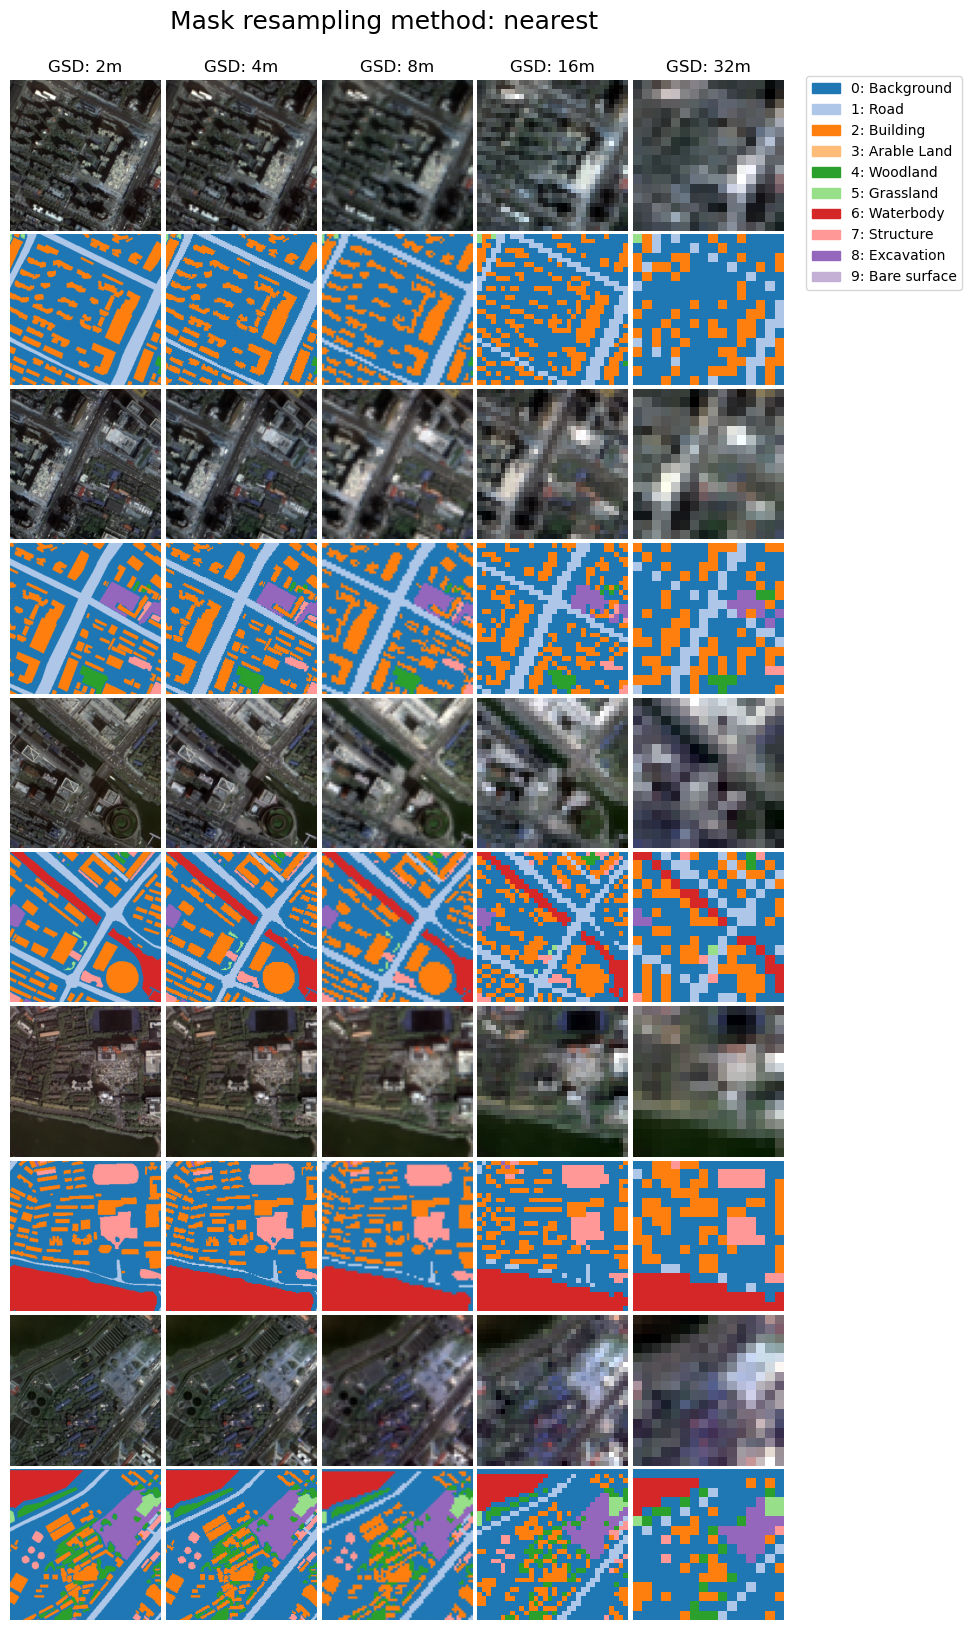

In [24]:
GSDs = [2, 4, 8, 16, 32]
num_samples = 5
mask_mode = 'nearest'

fig, axes = plt.subplots(num_samples*2, len(GSDs), figsize=(2*len(GSDs), 2*num_samples*2), gridspec_kw={'wspace':0.025, 'hspace':0.025})
fig.suptitle(f"Mask resampling method: {mask_mode}", fontsize=18, y=0.915)
for i, GSD in enumerate(GSDs):
    datamodule = WUSUSegmentationDataModule(
        data_root=DATA_ROOT,
        class_mapping_path=CLASS_MAPPING_PATH,
        in_channels=IN_CHANNELS, 
        batch_size=2,
        num_workers=4,
        merge_classes=MERGE_CLASSES,
        target_gsd=GSD,
        mask_mode=mask_mode)
    datamodule.setup()
    val_dataset = datamodule.val_dataset
    axes[0,i].set_title(f"GSD: {GSD}m", fontsize=12)

    for j in range(5):
        item = val_dataset.__getitem__(j*1) # 0, 25, 50, 75, 100
        img, mask = item["image"], item["mask"]
        rgb_image = img[:3, :, :].permute(1,2,0).numpy()
        rgb_image = (rgb_image - rgb_image.min(axis=(0,1), keepdims=True)) / (rgb_image.max(axis=(0,1), keepdims=True) - rgb_image.min(axis=(0,1), keepdims=True))
        
        axes[2*j,i].imshow(rgb_image)
        axes[2*j, i].axis('off')
        axes[2*j+1,i].imshow(mask, cmap=val_dataset.legend.cmap, norm=val_dataset.legend.norm)
        axes[2*j+1, i].axis('off')

        original_filename = Path(item['filename']).stem
        output_img_path = OUTPUT_DIR / f"{original_filename}_sample{j*25}_gsd{GSD}m.png"
        #plt.imsave(output_img_path, rgb_image)
        
        output_mask_path = OUTPUT_DIR / f"{original_filename}_sample{j*25}_gsd{GSD}m_mask.png"
        #plt.imsave(output_mask_path, mask, cmap=val_dataset.legend.cmap, vmin=0, vmax=len(val_dataset.legend.class_names)-1)

plt.tight_layout(rect=[0, 0, 0.75, 1])
val_dataset.legend.plot(bbox_to_anchor=(1.15, 10.25), loc='upper left')
fig.savefig(OUTPUT_DIR / "gsd_comparison_grid.png", dpi=300, bbox_inches='tight')
plt.show()